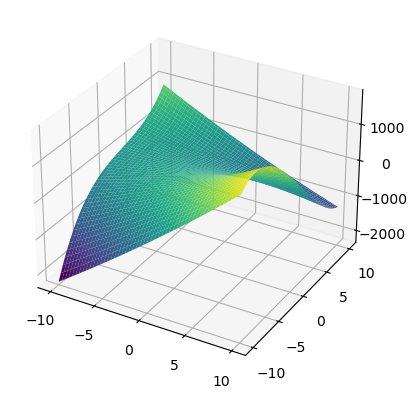

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 - 15*X*Y + 44*X + Y**3 - 6*Y**2 - 93*Y + 251
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()


Примечание: тк функция стремится к бесконечности в двух направлениях, то алгоритмы могут уходить в $−∞$

# Градиентный метод с дроблением шага

Опишем два варианта метода. В обоих вариантах параметрами метода являются
величины $α >0$ и $λ ∈ (0, 1)$. В варианте Б) параметром будет также
$ϵ ∈ (0, 1)$. Параметр $λ$ называется коэффициентом дробления. Значения параметров выбираются наперед; они одни и те же для всех
итераций.
А) Выбор $α^k$ происходит следующим образом. Положив сначала
$\bar α = α$, проверим неравенство
$f(x^k + \bar αp^k)$< $f(x^k)$. (4)
Если оно выполнено, то берем $α^k = \barα$. В противном случае значение $\barα$ изменяем, домножив его на $λ$ (дробление $\barα$). Снова проверяем (4).
И так до тех пор, пока неравенство (4) не выполнится. То значение $\barα$, при котором это произойдет впервые, и выбираем в качестве $α^k$.
Б) В этом варианте для того, чтобы выбор $α^k$ гарантировал существенное убывание функции $f(x)$ при переходе от точки $x^k$ к точке $x^k+1$, стараются удовлетворить не неравенству (3) как в варианте
А), а более сильному неравенству $f(x^k+1) = f(x^k + α^kp^k) < f(x^k) − ϵα^k∥∇f(x^k)∥^2$.
Выбор $α^k$ происходит так. Положив сначала $\barα$ = $α$, проверим неравенство $f(x^k + \barαp^k) < f(x^k) − ϵ\barα∥∇f(x^k)∥^2$.
Если оно выполнено, то берем $α^k = \barα$. В противном случае производим постепенное дробление $\barα$, домножая его на $λ$, до тех пор,
пока не выполнится (5). То значение $\barα$, при котором это произойдет
впервые,выберем в качестве $α^k$.

Точка минимума: (273.9527, 39.4801)
Значение функции в точке минимума: -26367.1433


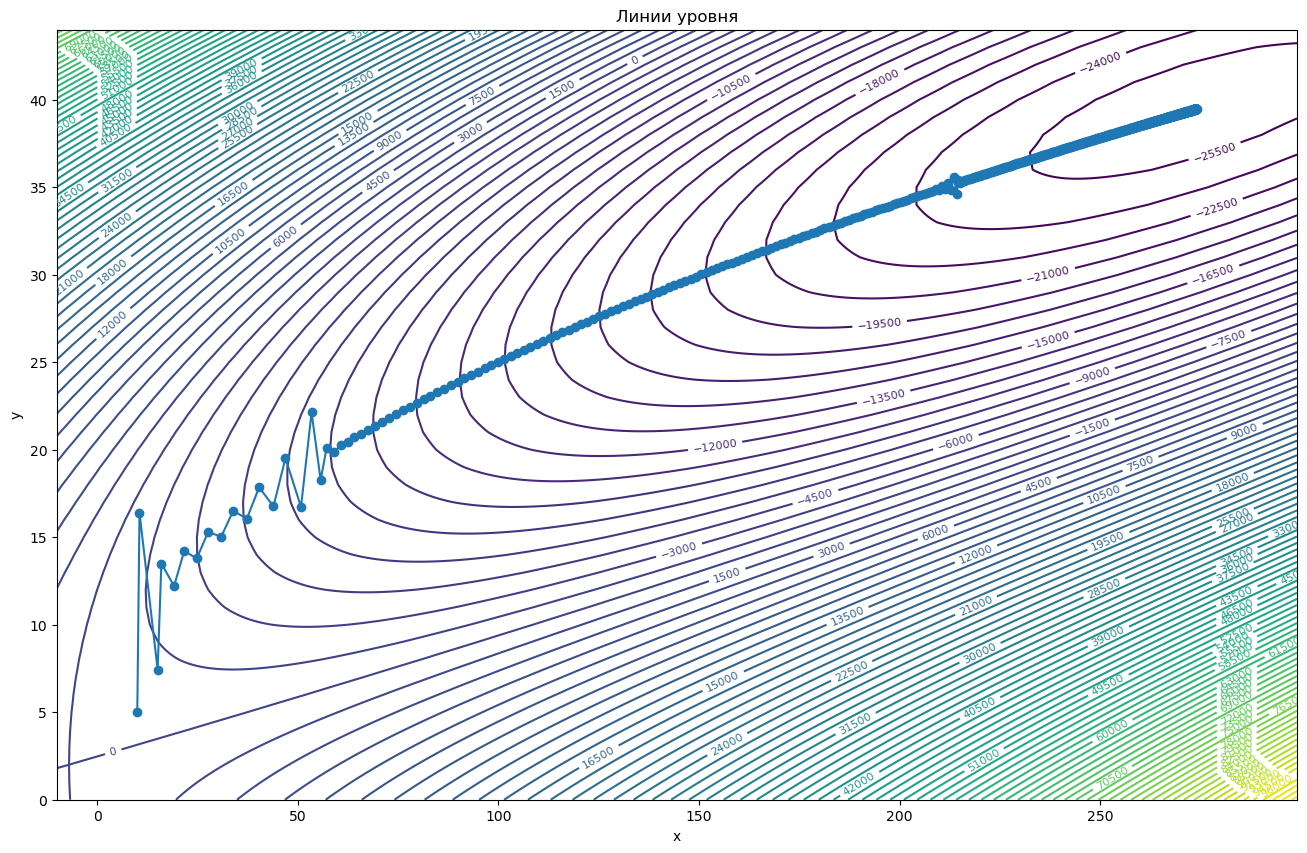

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

def Z(X, Y):
    return X**2 - 15*X*Y + 44*X + Y**3 - 6*Y**2 - 93*Y + 251

def grad_Z(X, Y):
    return np.array([2*X - 15*Y + 44, -15*X + 3*Y**2 - 12*Y - 93])
 
    return X, Y, Z(X, Y), np.array(Z_values), np.array(X_values), np.array(Y_values)

def gradient_descent_with_line_search(X0, Y0, alpha0, eps, max_iter):
    X = X0
    Y = Y0
    alpha = alpha0
    Z_values = []
    X_values = []
    Y_values = []
    for i in range(max_iter):
        Z_values.append(Z(X,Y))
        X_values.append(X)
        Y_values.append(Y)
        grad = grad_Z(X, Y)
        while Z(X - alpha*grad[0], Y - alpha*grad[1]) > Z(X, Y) - alpha*0.5*eps*np.sum(grad**2):
            alpha *= 0.5
        X -= alpha*grad[0]
        Y -= alpha*grad[1]
        if abs(grad[0]) < eps:
            break
    return X, Y, Z(X, Y), np.array(Z_values), np.array(X_values), np.array(Y_values)
X0 = 10
Y0 = 5
alpha0 = 0.1
X_min, Y_min, Z_min, Z_values, X_values, Y_values = gradient_descent_with_line_search(X0, Y0, alpha0, 1e-6, 1000)
print("Точка минимума: ({:.4f}, {:.4f})".format(X_min, Y_min))
print("Значение функции в точке минимума: {:.4f}".format(Z_min))

x = [i for i in range(-10,300)]
y = [i for i in range(0,45)]
X, Y = np.meshgrid(x, y)
Z = X**2 - 15*X*Y + 44*X + Y**3 - 6*Y**2 - 93*Y + 251
pylab.figure(figsize = (16, 10))
pylab.title('Линии уровня')
pylab.xlabel('x')
pylab.ylabel('y')
CS=pylab.contour(X, Y, Z,100)
pylab.clabel(CS, fontsize=8)
pylab.plot(X_values, Y_values, 'o-')
pylab.show()


# Метод покоординатного спуска.

 Для построения минимизирующей последовательности используется формула (2). При этом
вектор p
k
определяется по правилу (циклический покоординатный
спуск):
p
k = $e_k−[k/n]n+1$, k = 0, 1, 2, . . . ,
где [t]-целая часть числа t, $e_j$ = {0, . . . , 0, 1, 0, . . . 0} (единица стоит
на j-ом месте), j = 1, . . .,n. Число $α_k$ $∈ (−∞,∞)$ можно определять,
например, следующим способом
$f(x^k + αkp^k)$ = $\min_{−∞<α<∞}$ $f(x^k + αp^k)$.

Точка минимума: (-4990.0000, -4995.0000)
Значение функции в точке минимума: -125123805449.0000


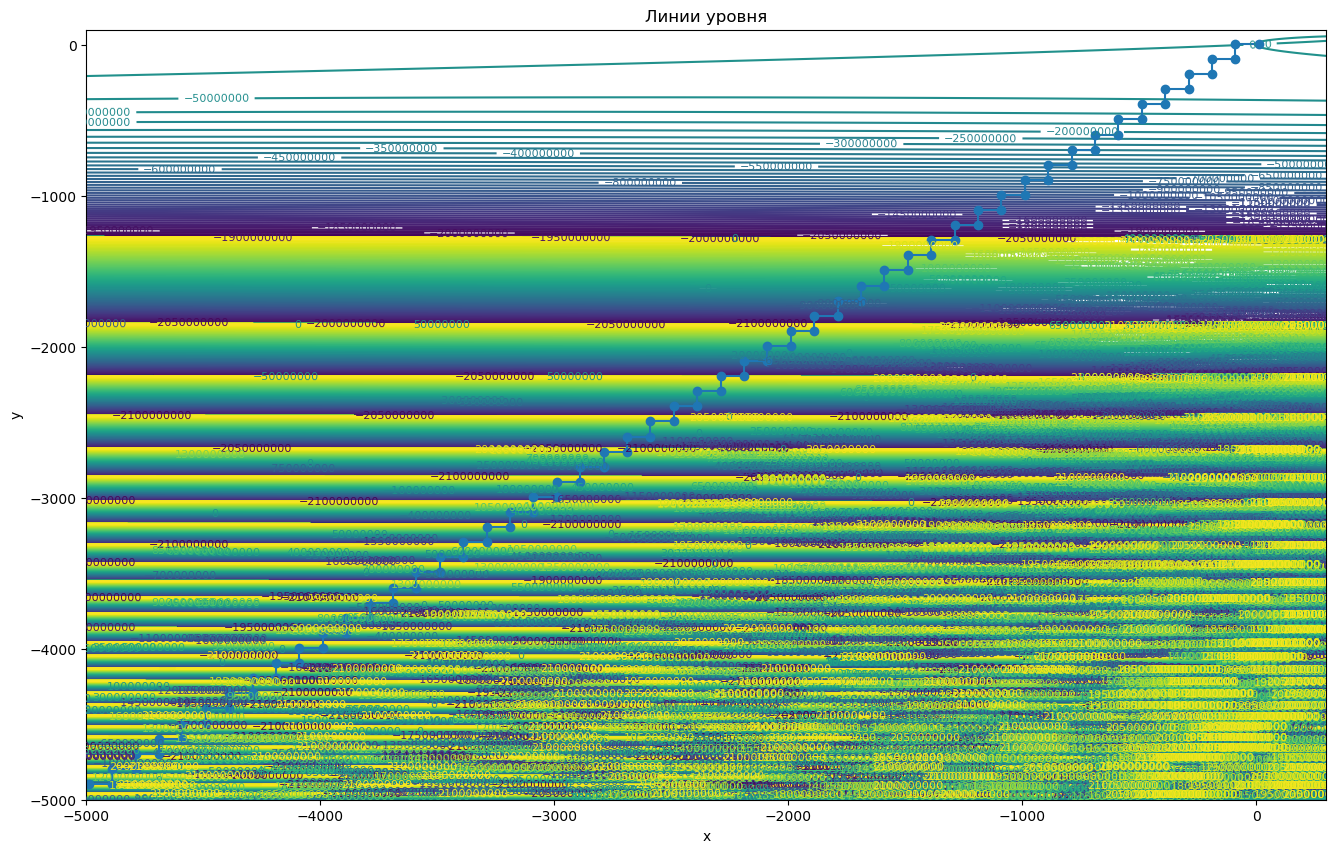

In [155]:
import math
import numpy as np
import pylab
def Z(X, Y):
    return X**2 - 15*X*Y + 44*X + Y**3 - 6*Y**2 - 93*Y + 251

def grad_Z(X, Y):
    return np.array([2*X - 15*Y + 44, -15*X + 3*Y**2 - 12*Y - 93])
def sp(x0,y0,eps):
    X = X0
    Y = Y0
    Z_values = []
    X_values = []
    Y_values = []
    grad = grad_Z(X, Y)
    Yes=True
    for i in range(100):
        a=np.linspace(-100,100,200000)
        b=[]
        for i in range(len(a)):
                b.append(Z(X-a[i],Y-a[i]))    
        alpha=a[b.index(min(b))] 
        Z_values.append(Z(X,Y))
        X_values.append(X)
        Y_values.append(Y)
        grad = grad_Z(X, Y)
        if Yes==True:
            X-=alpha
            Yes=False
        elif Yes==False:    
            Y-=alpha
            Yes=True
        if abs(grad[0])<eps:
            break
    return X,Y,Z(X,Y),X_values,Y_values  
X_min,Y_min,Z_min,X_values,Y_values=sp(10, 5, 1e-6 )
print("Точка минимума: ({:.4f}, {:.4f})".format(X_min, Y_min))
print("Значение функции в точке минимума: {:.4f}".format(Z_min))

x = [i for i in range(-5000,300)]
y = [i for i in range(-5000,100)]
X, Y = np.meshgrid(x, y)
Z = X**2 - 15*X*Y + 44*X + Y**3 - 6*Y**2 - 93*Y + 251
pylab.figure(figsize = (16, 10))
pylab.title('Линии уровня')
pylab.xlabel('x')
pylab.ylabel('y')
CS=pylab.contour(X, Y, Z,100)
pylab.clabel(CS, fontsize=8)
pylab.plot(X_values, Y_values, 'o-')
pylab.show()


# Метод Хука-Дживса.


В данном алгоритме предлагается логически простая стратегия
поиска, в которой используются априорные сведения о топологии
функции и, в то же время, отвергается уже устаревшая информация
об этой функции. В интерпретации Вуда алгоритм включает два
основных этапа: a) исследующий поиск вокруг базисной точки $x^k$;
б)поиск по "образцу т.е. в направлении, выбранном для минимизации.
В первую очередь задается начальная точка поиска xk и начальное приращение (шаг) h. После этого начинается исследующий поиск.
Исследующий поиск. Делаем пробный шаг по первой переменной x1 с заданным шагом h > 0 т.е. вычисляем значение функции в
точке $(x^k_1+h, x^k_2, .., x^k_n)$ и если $f(x^k_1+h, x^k_2, .., x^k_n)$ > $f(x^k_1, x^k_2, .., x^k_n)$, тогда точку $(x^k_1, x^k_2, .., x^k_n)$ оставляем без изменений и делаем пробныйшаг в противоположном направлении. Если $f(x^k_1 − h, x^k_2, .., x^k_n)$ >$f(x^k_1, x^k_2, .., x^k_n)$, тогда точку $(x^k_1, x^k_2, .., x^k_n)$ оставляем без изменений,иначе точку $(x^k_1, x^k_2, .., x^k_n)$ заменяем на точку $(x^k_1 + h, x^k_2, .., x^k_n)$ или $(x^k_1 −h, x^k_2, .., x^k_n)$ в зависимости от того, где значение функции меньше исходного. Из вновь полученной точки делаем пробные шаги по оставшимся координатам, используя тот же самый алгоритм. Если в процессе исследующего поиска не удается сделать ни одного удачного пробного шага, тогда необходимо скорректировать
(уменьшить) шаг h . После чего вновь переходим к исследующему
поиску. Если в процессе исследующего поиска сделан хотя бы один
удачный пробный шаг, то переходим к поиску по образцу.
Поиск по образцу. После исследующего поиска мы получаем
точку $x^k$. Направление $p^k = \bar x^k−x^k$
определяет направление, в котором функция уменьшается. Поэтому проводим минимизацию функции в указанном направлении, решая задачу
A)  $f(x^k + α_kp^k) = min_{α>0}f(x^k + αp^k)$.
Если удастся сделать удачный шаг в поиске по ”образцу” , то в
результате находим новое приближение $x^k+1 = x^k + α_kp^k$
Из точки $x^k+1$ начинаем новый исследующий поиск и т.д.
Возможны модификации алгоритма:
Б) в процессе исследующего поиска ищется минимум по каждой
переменной;
В) в процессе поиска по образцу ищется не минимум функции, а

просто делается шаг в заданном найденном направлении с фиксированным значением параметра $α^k$, так чтобы $f(x^k + α^kp^k) < f(x^k).$

Точка минимума: (274.2500, 39.5000)
Значение функции в точке минимума: -449.0000


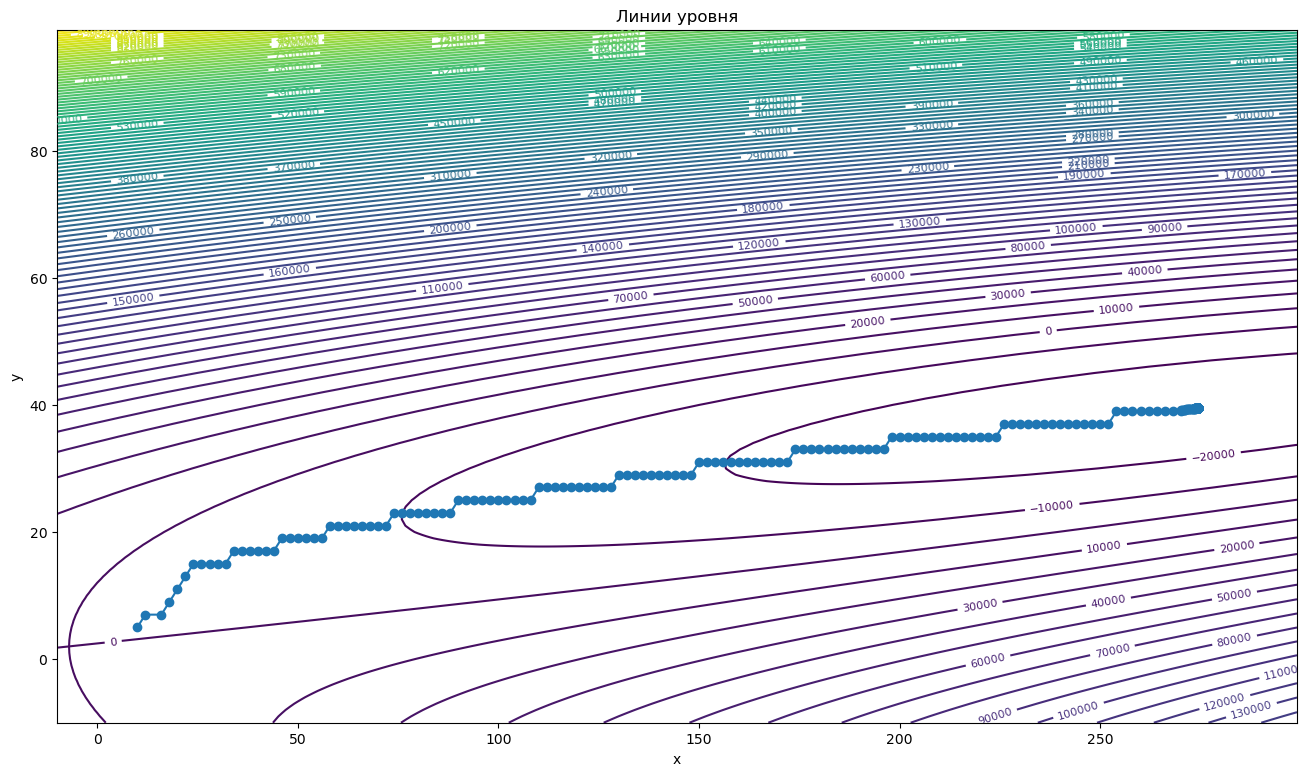

In [191]:
import pylab
import numpy as np
X0=10
Y0=5
def Z(X,Y):
    return  X**2 - 15*X*Y + 44*X + Y**3 - 6*Y**2 - 93*Y + 251
def hooke_jeeves(Z, X,Y, h=2, alpha=10, E=1e-6):
    
    X0 = X
    Y0=Y
    i = 0
    X_values = []
    Y_values = []
    X_values.append(X0)
    Y_values.append(Y0)
    def search(X0,y0, h): 
        X1 = X0
        Y1=Y0
        while h >= E:
            if Z(X1 + h, Y1) < Z(X1,Y1):
                X1,Y1 = X1 + h, Y1
            elif Z(X1 - h, Y1) < Z(X1,Y1):
                X1,Y1 = X1 - h, Y1

            if Z(X1, Y1 + h) < Z(X1,Y1):
                X1,Y1 = X1, Y1 + h
            elif Z(X1, Y1 - h) < Z(X1,Y1):
                 X1,Y1 = X1, Y1 - h

            if Z(X1,Y1) >= Z(X0,Y0):
                h /= alpha
            else:
                break
        
        return X1,Y1, h

    X1,Y1, h = search(X0,Y0, h)
    X_values.append(X1)
    Y_values.append(Y1)
    while h >= E:
        i += 1
        px = X0 + 2*(X1 - X0)
        py= Y0 + 2*(Y1 - Y0)
        px1,py1, h = search(px,py, h)
        
        if Z(px1,py1) < Z(X1,Y1):
            X1 = px1
            Y1=py1
            X0 = X1
            Y0=Y1
        elif h < E:
            break
        X_values.append(X1)
        Y_values.append(Y1)
    
    return X1,Y1,Z(X,Y),X_values,Y_values  


X_min,Y_min,Z_min,X_values,Y_values = hooke_jeeves(Z, X0,Y0)
print("Точка минимума: ({:.4f}, {:.4f})".format(X_min, Y_min))
print("Значение функции в точке минимума: {:.4f}".format(Z_min))
x = [i for i in range(-10,300)]
y = [i for i in range(-10,100)]
X, Y = np.meshgrid(x, y)
Z = X**2 - 15*X*Y + 44*X + Y**3 - 6*Y**2 - 93*Y + 251
pylab.figure(figsize = (16, 9))
pylab.title('Линии уровня')
pylab.xlabel('x')
pylab.ylabel('y')
CS=pylab.contour(X, Y, Z,100)
pylab.clabel(CS, fontsize=8)
pylab.plot(X_values, Y_values, 'o-')
pylab.show()


# Метод Розенброка.

Идея метода заключается в том, что выбирается система ортогональных направлений $p^k_1, p^k_2, ..., p^k$, в каждом из которых последовательно ищется минимальное значение, после чего система направлений поворачивается так, чтобы одна из осей совпала с направлением полного перемещения, а остальные были ортогональны между
собой. Алгоритм Розенброка состоит из двух этапов:
Покоординатный спуск. Пусть $x^k$- вектор k-приближения и $p^k_1, p^k_2, ..., p^k$ система ортогональных направлений. На первой итерации это может быть ортонормированная система координат. Нaчиная с заданного   $x^k$ последовательно осуществляем минимизацию
функции $f(x)$ в направлениях, соответстствующих $p^k_1, p^k_2, ..., p^k$ находя последовательные приближения:

$x^{k+1}_1 = x^k_1 + λ^k_1p^k_1$ ;    $λ^k_1 = arg {min}_{−∞<α<∞}f(x^k + αp^k_1)$ 

$x^k_n = x^k_{n-1} + λ^k_{n-1}p^k_{n-1}$;  $λ^k_n = arg {min}_{−∞<α<∞}f(x^k + αp^k_n)$ 

Поворот ортогональных напрвлений. А) Ортогональные направления поиска $p^k_1, p^k_2, ..., p^k$ поворачивают так, чтобы они оказались вытянутыми вдоль "оврага"("хребта").
Для этого с помощью найденных $λ^k_1, λ^k_2, ..., λ^k$  строим систему вектров
$A^k_1, A^k_2, ..., A^k$

$A^k_i =∑^n_{j=i}λ^k_jp^k_j,$  $ i= \overline{ 1, n}$ которую затем с помощью процедуры Грама-Шмидта ортогонализируем:
$p^{k+1}_1 =\frac{A^k_1}{||A^k_1||}$  

$B^k_i = A^k_i −∑^{i−1}_{j=1}[(A^k_i)^′p^{k+1}_j]p^{k+1}_j$ , $p^{k+1}_i =\frac{B^k_i}{||B^k_i||}$,
  $ i= \overline{ 2, n}$.
Для эффективной работы алгоритма необходимо, чтобы ни один
из векторов системы   $p^k_1, p^k_2, ..., p^k$ не оказался равным нулевому. Для этого в алгоритме следует располагать параметры $λ^k_1, λ^k_2, ..., λ^k$ в порядке убывания по абсолютному значению, т.е.  $|λ^k_1| > |λ^k_2| >, ..., > |λ^k_n|$ и в построенной системе таким образом системе $λ^k_1, λ^k_2, ..., λ^k$ отбросить m последних, если они имеются, нулевых чисел $λ^k_m, λ^k_{m+1}, ..., λ^k$
При этом положить $p^{k+1}_m = p^k_m, ..., p^{k+1}_n = p^k_n$ 
Б) Так как вектора $B^k_{j+1}$ и $||B^k_{j+1}||$ пропорциональны $λ^k_j$ при условии 
$∑^n_{i=1}|λ^k_i|^2\neq0$  и, следовательно, при вычислении вектора $p^{k+1}_j =\frac{B^k_j}{||B^k_j||}$, величины $λ^k_j$ сокращаются и тогда вектора $e^{k+1}_j$ могут быть найдены
по следующему алгоритму
    $p^{k+1}_1 =\frac{A^k_1}{||A^k_1||}$
    
$p^{k+1}_{1} =\frac{A^k_i||A^k_{i−1}||^2 − A^k_{i−1}||A^k_i||^2}{||A^k_i||||A^k_{i−1}\sqrt{|||A^k_i||^2 − ||A^k_{i−1}||^2||}}$ ,   $ i= \overline{ 2, n}$.

C:\Users\Ivan\AppData\Local\Temp\ipykernel_21748\906810636.py:3: RuntimeWarning: overflow encountered in double_scalars
  return    X**2 - 15*X*Y + 44*X + Y**3 - 6*Y**2 - 93*Y + 251
C:\Users\Ivan\AppData\Local\Temp\ipykernel_21748\906810636.py:36: RuntimeWarning: invalid value encountered in divide
  p1 = (Z1 - Z0) /(np.linalg.norm(Z1 - Z0))
C:\Users\Ivan\AppData\Local\Temp\ipykernel_21748\906810636.py:42: RuntimeWarning: invalid value encountered in double_scalars
  Pravda= np.linalg.norm(Z1 - Z0) >= E or abs(Z(X1,Y1) - Z(X0,Y0)) >= E


Точка минимума: (7242534473269494186661644905184377929505805951092415053512993358262979629646036489560441490598926114558574592.0000, 7242534473269494186661644905184377929505805951092415053512993358262979629646036489560441490598926114558574592.0000)
Значение функции в точке минимума: -inf


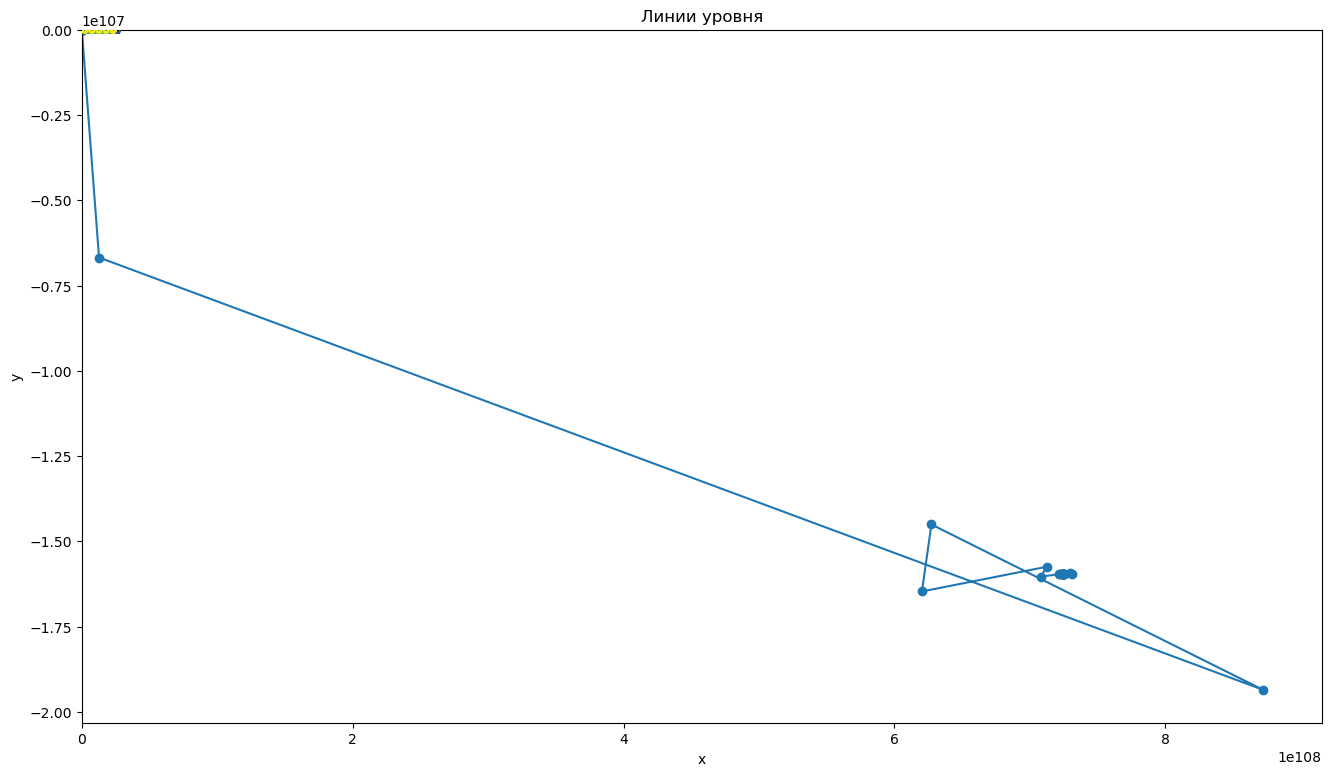

In [190]:
import numpy as np
def Z(X,Y):
    return    X**2 - 15*X*Y + 44*X + Y**3 - 6*Y**2 - 93*Y + 251
X0 = 10
Y0=5
def rosenbrock(Z, X,Y ,h1=1, h2=1, b1=3, b2=-0.4, E=1e-10):
    X0 = X
    Y0=Y
    px1 = 1 
    py1 = 0
    p1=np.array([px1,py1])
    px2=0
    py2=1
    i = 0
    X_values = []
    Y_values = []
    X_values.append(X0)
    Y_values.append(Y0)
    Pravda=True
    while Pravda:
        if Z(X0 + h1*px1,Y0+ h1*py1) < Z(X0,Y0):
            h1 *= b1
        else:
            h1 *= b2
        
        if Z(X0+h2*px2,Y0 + h2*py2) < Z(X0,Y0):
            h2 *= b1
        else:
            h2 *= b2

        X1 = X0 + h1*px1 + h2+px2
        Y1= Y0+ h2*py2 + h2*py2
        Z0=np.array([X0,Y0])
        Z1=np.array([X1,Y1])
        p2=np.array([px2,py2])
        p1 = (Z1 - Z0) /(np.linalg.norm(Z1 - Z0)) 
        p2 = p2 - np.dot(p2, p1)*p1 /(np.linalg.norm((px1)**2)) 
        px1=p1[0]
        py1=p1[1]
        px2=p2[0]
        py2=p2[1]
        Pravda= np.linalg.norm(Z1 - Z0) >= E or abs(Z(X1,Y1) - Z(X0,Y0)) >= E
        X0 =X1
        Y0=Y1
        X_values.append(X1)
        Y_values.append(Y1)
    return X1,X1,Z(X1,Y1),X_values,Y_values,
X_min, Y_min, Z_min, X_values, Y_values =  rosenbrock(Z, X0,Y0)

print("Точка минимума: ({:.4f}, {:.4f})".format(X_min, Y_min))
print("Значение функции в точке минимума: {:.4f}".format(Z_min))
x = [i for i in range(0,5000)]
y = [i for i in range(-7222,0)]
X, Y = np.meshgrid(x, y)
Z = X**2 - 15*X*Y + 44*X + Y**3 - 6*Y**2 - 93*Y + 251
pylab.figure(figsize = (16, 9))
pylab.title('Линии уровня')
pylab.xlabel('x')
pylab.ylabel('y')
CS=pylab.contour(X, Y, Z,100)
pylab.clabel(CS, fontsize=8)
pylab.plot(X_values, Y_values, 'o-')
pylab.show()
